In [84]:
%load_ext autoreload
%autoreload 2

from datasets import *
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# Import and time synthetic data
X, y = import_synthetic()

In [86]:
# Time how long it takes to import synthetic data
%timeit import_synthetic()

498 ms ± 8.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
# Get dataset length
len(X), len(y)

(1200, 1200)

In [88]:
# Set dataset number
DSN = 40

In [89]:
X[DSN].head()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
0,BA-4-100015,0,998,2,0,0
1,BA-4-100015,1,998,2,0,0
2,BA-4-100015,2,998,2,0,0
3,BA-4-100015,3,998,2,0,0
4,BA-4-100015,4,998,2,0,0


In [90]:
X[DSN].tail()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
295,BA-4-100015,295,100,900,755,143
296,BA-4-100015,296,100,900,755,143
297,BA-4-100015,297,100,900,755,143
298,BA-4-100015,298,100,900,756,143
299,BA-4-100015,299,100,900,756,144


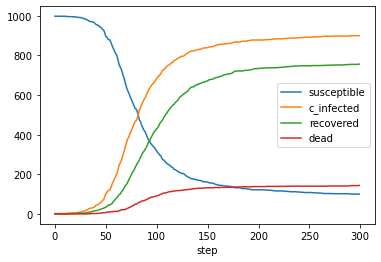

case                BA-4-100015
population                 1000
initial_infected              2
infectiousness         0.220911
i_out                  0.626007
i_rec_prop              0.82412
network                      BA
k                             4
Name: 40, dtype: object

In [91]:
# Plot time series data
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
X[DSN].plot(y=ax_y, use_index=True)
plt.show()

# Show features
y.iloc[DSN]

In [92]:
# Format X[DSN] and y[DSN] as ndarrays (to be passed to machine learning library)
Xn, yn = synthetic_numpy(X, y)

Xn[DSN], yn[DSN], Xn[DSN].dtype, yn[DSN].dtype

(array([[  0, 998,   2,   0,   0],
        [  1, 998,   2,   0,   0],
        [  2, 998,   2,   0,   0],
        ...,
        [297, 100, 900, 755, 143],
        [298, 100, 900, 756, 143],
        [299, 100, 900, 756, 144]]),
 array([1.        , 0.        , 0.22091058, 0.62600727, 0.82412023,
        0.        , 0.        ]),
 dtype('int64'),
 dtype('float64'))

In [93]:
# Time how long synthetic_numpy takes
%timeit synthetic_numpy(X, y)

187 ms ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
# Time how long it takes to iterate through whole dataset
%timeit for x, y in zip(Xn, yn): pass

210 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [95]:
Xrs = resample_lengths(Xn)
Xrs.shape

(1200, 401, 5)

In [83]:
def plot_numpy(xs: np.ndarray):
    ax_x = 'step'
    ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
    df = pd.DataFrame(columns=[ax_x] + ax_y)
    df.plot(y=ax_y, x=ax_x)
    plt.show()

array([[0.000000e+00, 9.980000e+02, 2.000000e+00, 0.000000e+00,
        0.000000e+00],
       [7.475000e-01, 9.980000e+02, 2.000000e+00, 0.000000e+00,
        0.000000e+00],
       [1.495000e+00, 9.980000e+02, 2.000000e+00, 0.000000e+00,
        0.000000e+00],
       ...,
       [2.975050e+02, 1.000000e+02, 9.000000e+02, 7.555050e+02,
        1.430000e+02],
       [2.982525e+02, 1.000000e+02, 9.000000e+02, 7.560000e+02,
        1.432525e+02],
       [2.990000e+02, 1.000000e+02, 9.000000e+02, 7.560000e+02,
        1.440000e+02]])